<a href="https://colab.research.google.com/github/CansecoSergio/python-data-science/blob/main/M7%20Enunciados%20Practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import cluster, metrics
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
house = pd.read_csv('/content/drive/MyDrive/Archivos Collab/M7/housedata.csv')
house

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [5]:
house.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [6]:
house.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [7]:
house.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [9]:
house2 = house.copy()

In [10]:
for col in house2.columns:
    if house2[col].dtype == 'object':
        house2[col] = OrdinalEncoder().fit_transform(house2[[col]])

In [11]:
house2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0.0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522.0,36.0,62.0,0.0
1,0.0,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899.0,35.0,58.0,0.0
2,0.0,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291.0,18.0,26.0,0.0
3,0.0,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263.0,3.0,7.0,0.0
4,0.0,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352.0,31.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,68.0,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447.0,35.0,62.0,0.0
4596,68.0,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960.0,3.0,6.0,0.0
4597,68.0,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033.0,32.0,37.0,0.0
4598,69.0,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498.0,35.0,71.0,0.0


In [12]:
X_train = house2.to_numpy()
print(X_train)

[[0.00000000e+00 3.13000000e+05 3.00000000e+00 ... 3.60000000e+01
  6.20000000e+01 0.00000000e+00]
 [0.00000000e+00 2.38400000e+06 5.00000000e+00 ... 3.50000000e+01
  5.80000000e+01 0.00000000e+00]
 [0.00000000e+00 3.42000000e+05 3.00000000e+00 ... 1.80000000e+01
  2.60000000e+01 0.00000000e+00]
 ...
 [6.80000000e+01 4.16904167e+05 3.00000000e+00 ... 3.20000000e+01
  3.70000000e+01 0.00000000e+00]
 [6.90000000e+01 2.03400000e+05 4.00000000e+00 ... 3.50000000e+01
  7.10000000e+01 0.00000000e+00]
 [6.90000000e+01 2.20600000e+05 3.00000000e+00 ... 9.00000000e+00
  2.60000000e+01 0.00000000e+00]]


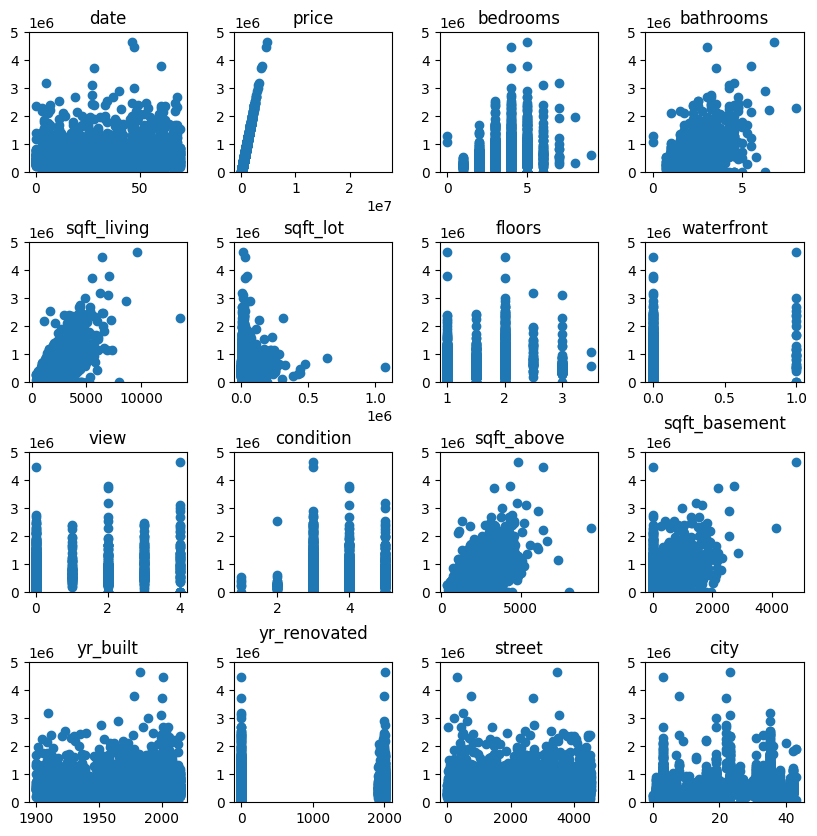

In [13]:
v = 0
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(4):
  for j in range(4):
    axs[i,j].scatter(X_train[:,v], X_train[:,1])
    axs[i,j].set_title(house.columns[v])
    axs[i,j].set_ylim([0,0.5e7])
    v+=1
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [14]:
X = StandardScaler().fit_transform(X_train)

In [15]:
X

array([[-1.83371327, -0.42386353, -0.44112227, ...,  0.8618055 ,
         1.11182456,  0.        ],
       [-1.83371327,  3.2495981 ,  1.75970468, ...,  0.77834292,
         0.92059477,  0.        ],
       [-1.83371327, -0.37242442, -0.44112227, ..., -0.64052081,
        -0.60924357,  0.        ],
       ...,
       [ 1.61700632, -0.23956224, -0.44112227, ...,  0.5279552 ,
        -0.08336164,  0.        ],
       [ 1.66775219, -0.61826787,  0.6592912 , ...,  0.77834292,
         1.5420916 ,  0.        ],
       [ 1.66775219, -0.58775916, -0.44112227, ..., -1.39168397,
        -0.60924357,  0.        ]])

In [16]:
np.random.seed(42)

In [17]:
nc = 10

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

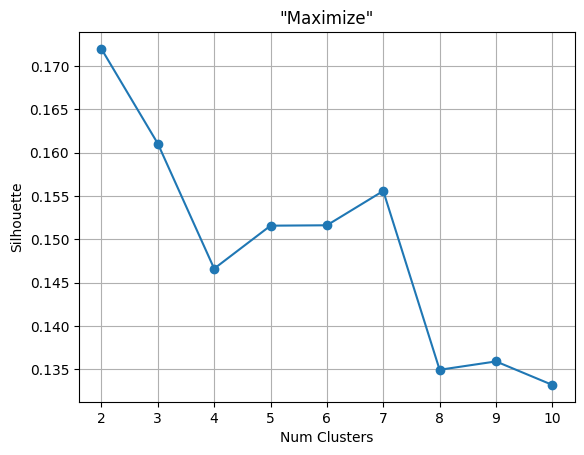

In [18]:
results = {}
for k in range(2, nc+1):
  k_means = cluster.KMeans(n_clusters=k).fit(X)
  y_pred = k_means.predict(X)
  results[k] = metrics.silhouette_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(clusters_counts)
plt.ylabel('Silhouette')
plt.show()

In [19]:
k = 7  # Debido a la grafica
k_means = cluster.KMeans(n_clusters=k).fit(X)
y_pred = k_means.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
y_pred

array([3, 4, 1, ..., 2, 0, 1], dtype=int32)

In [21]:
house['groups'] = y_pred

In [22]:
houses = []  # Segmentos
for g in range(k):
  houses.append(house[house['groups']==g])

In [23]:
for g in range(k):
    print('Group'+str(g),'has',len(houses[g]),'houses.')

Group0 has 732 houses.
Group1 has 851 houses.
Group2 has 1487 houses.
Group3 has 1105 houses.
Group4 has 317 houses.
Group5 has 74 houses.
Group6 has 34 houses.


In [24]:
grouped = pd.DataFrame()
grouped['Features'] = house.columns[:-1]
for g in range(k):
    arr = []
    for col in grouped['Features']:
        if houses[g][col].dtype != 'object':
            arr.append(np.round(houses[g][col].mean(),2))
        else:
            arr.append(houses[g][col].value_counts().keys()[0])
    grouped['Group'+str(g)] = arr
grouped

,Features,Group0,Group1,Group2,Group3,Group4,Group5,Group6
0,date,2014-06-24 00:00:00,2014-06-26 00:00:00,2014-06-17 00:00:00,2014-06-23 00:00:00,2014-07-01 00:00:00,2014-06-26 00:00:00,2014-05-12 00:00:00
1,price,590409.97,404615.82,558633.31,380234.99,1226040.61,655754.28,2190985.29
2,bedrooms,3.83,3.36,3.54,2.66,4.4,3.65,3.35
3,bathrooms,2.21,1.9,2.59,1.34,3.43,2.56,2.84
4,sqft_living,2251.17,1805.66,2417.39,1306.01,4019.09,3093.51,3404.53
5,sqft_lot,9338.92,14523.99,10327.72,7955.5,20963.82,237754.05,21708.32
6,floors,1.24,1.11,2.06,1.18,1.76,1.66,1.63
7,waterfront,0.0,0.0,0.0,0.0,0.0,0.0,0.97
8,view,0.26,0.04,0.05,0.1,1.71,0.51,3.44
9,condition,4.07,3.68,3.1,3.35,3.43,3.32,3.47
